In [8]:
using TensorKit 
using Plots
include("./tebd.jl")

Σ_Spectrum (generic function with 3 methods)

In [2]:
function SPT_Chain(;U,B)
    V = ℂ^3 # Spin 1 system
    # Spin matrices (Somehow MPSKItModels don't have identity operator)
    Sx = TensorMap(zeros,ComplexF64,V←V)
    Sy = TensorMap(zeros,ComplexF64,V←V)
    Sz = TensorMap(zeros,ComplexF64,V←V)
    eye = id(V)
    
    Sx.data .= ([0.0 1.0 0.0; 1.0 0.0 1.0; 0.0 1.0 0.0] ./ sqrt(2))
    Sy.data .= ([0.0 -1.0*im 0.0; 1.0*im 0 -1.0*im; 0.0 1.0*im 0.0]) ./ sqrt(2)
    Sz.data .= [1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 -1.0]


    return Sx⊗Sx+Sy⊗Sy+Sz⊗Sz + 0.5*U*((Sz*Sz)⊗eye + eye⊗(Sz*Sz)) + 0.5*B*(eye⊗Sx+Sx⊗eye)
end

SPT_Chain (generic function with 1 method)

In [3]:
function Test_Gu_ITEBD_Steps(M::Int,χ::Int)
    δt = 1/3^(M+1)
    H = SPT_Chain(;B=1,U=1)
    @show δt 
    U = exp(-δt*H);
    spectrums = Vector{Vector{Float64}}()
    for i in range(1,M)
        U =Gu_ITEBD_Step(U,χ)
        push!(spectrums,Σ_Spectrum(U,(1,2),(3,4)))
    end
    return M, χ, spectrums
end

Test_Gu_ITEBD_Steps (generic function with 1 method)

In [5]:
results = Dict()
χ = 12
for M in range(12,20,step=2)
    @show M 
    _,χ, spectrum = Test_Gu_ITEBD_Steps(M,χ)
    results[(M,χ)] = spectrum 
end 

M = 12
δt = 6.272254743863069e-7
M = 14
δt = 6.969171937625632e-8
M = 16
δt = 7.743524375139592e-9
M = 18
δt = 8.603915972377324e-10
M = 20
δt = 9.559906635974805e-11


In [16]:
#reduce(hcat,results[20,10])

In [7]:
using Plots 

In [8]:
results 

Dict{Any, Any} with 5 entries:
  (12, 12) => [[1.0, 1.0, 1.0, 0.999999, 0.999999], [1.00001, 1.00001, 1.0, 0.9…
  (14, 12) => [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.00021, …
  (16, 12) => [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.00007, …
  (20, 12) => [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.00001, …
  (18, 12) => [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.00002, …

length(times) = 12
length(times) = 14
length(times) = 16
length(times) = 18
length(times) = 20


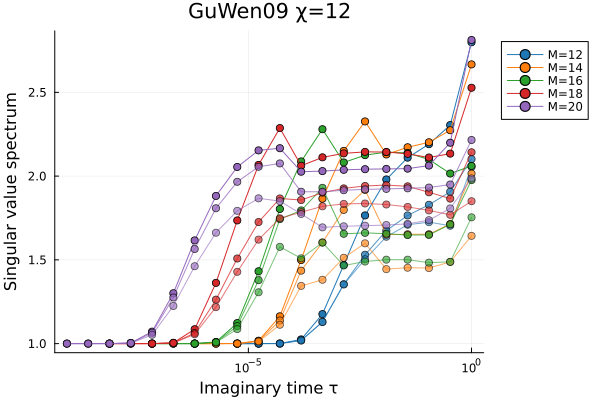

In [9]:
p = plot(xaxis=:log,legend = :outertopright,xlabel="Imaginary time τ",ylabel="Singular value spectrum",title="GuWen09 χ=12")
colors = [:]
for M in range(12,20,step=2)
    i = Int((M-12)//2+1)
    times = [3.0^(-M+i) for i in range(1,M)]
    @show length(times)
    for λi in range(1,3)
        label = λi == 1 ? "M=$M" : :none 
        plot!(times,reduce(hcat,results[M,12])[λi,:],marker=:circ,label=label,color=palette(:tab10)[i],alpha=1/(0.3*λi+0.7))    
    end
end
p 

In [10]:
χ = 10
for M in range(12,20,step=2)
    @show M 
    _,χ, spectrum = Test_Gu_ITEBD_Steps(M,χ)
    results[(M,χ)] = spectrum 
end 

M = 12
δt = 6.272254743863069e-7
M = 14
δt = 6.969171937625632e-8
M = 16
δt = 7.743524375139592e-9
M = 18
δt = 8.603915972377324e-10
M = 20
δt = 9.559906635974805e-11


length(times) = 12
length(times) = 14
length(times) = 16
length(times) = 18
length(times) = 20


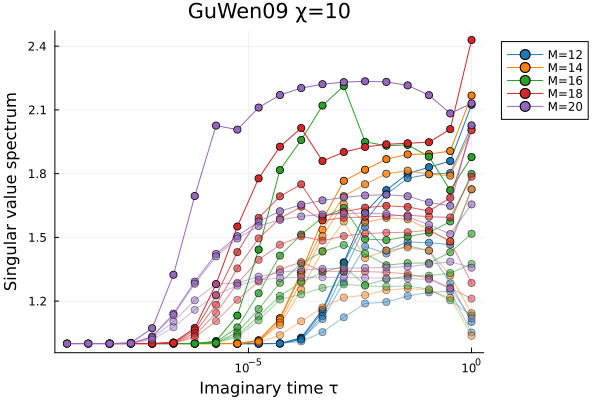

In [15]:
p = plot(xaxis=:log,legend = :outertopright,xlabel="Imaginary time τ",ylabel="Singular value spectrum",title="GuWen09 χ=10")
colors = [:]
for M in range(12,20,step=2)
    i = Int((M-12)//2+1)
    times = [3.0^(-M+i) for i in range(1,M)]
    @show length(times)
    for λi in range(1,5)
        label = λi == 1 ? "M=$M" : :none 
        plot!(times,reduce(hcat,results[M,10])[λi,:],marker=:circ,label=label,color=palette(:tab10)[i],alpha=1/(0.3*λi+0.7))    
    end
end
p 

In [53]:
function Test_Gu_ITEBD_Trunc_First_Steps(M::Int,χ::Int)
    δt = 1/3^(M+1)
    H = SPT_Chain(;B=1,U=1)
    @show δt 
    U = exp(-δt*H);
    spectrums = Vector{Vector{Float64}}()
    for i in range(1,M)
        U =Gu_ITEBD_Step_Trunc_First(U,χ)
        push!(spectrums,Σ_Spectrum(U,(1,2),(3,4)))
    end
    return M, χ, spectrums
end

Test_Gu_ITEBD_Trunc_First_Steps (generic function with 1 method)

In [54]:
results = Dict()
χ = 20
for M in range(16,24,step=2)
    @show M 
    _,χ, spectrum = Test_Gu_ITEBD_Trunc_First_Steps(M,χ)
    results[(M,χ)] = spectrum 
end 

M = 16
δt = 7.743524375139592e-9
M = 18
δt = 8.603915972377324e-10
M = 20
δt = 9.559906635974805e-11
M = 22
δt = 1.062211848441645e-11
M = 24
δt = 1.1802353871573832e-12


length(times) = 18
length(times) = 20
length(times) = 22
length(times) = 24


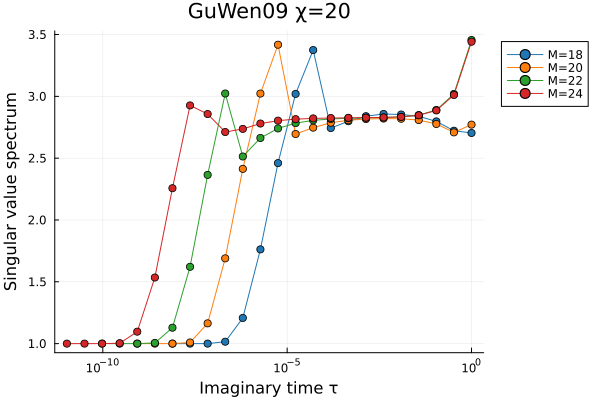

In [57]:
p = plot(xaxis=:log,legend = :outertopright,xlabel="Imaginary time τ",ylabel="Singular value spectrum",title="GuWen09 χ=$χ")
colors = [:]
for M in range(18,24,step=2)
    i = Int((M-18)//2+1)
    times = [3.0^(-M+i) for i in range(1,length(results[M,χ]))]
    @show length(times)
    for λi in range(1,1)
        label = λi == 1 ? "M=$M" : :none 
        plot!(times,reduce(hcat,results[M,χ])[λi,:],marker=:circ,label=label,color=palette(:tab10)[i],alpha=1/(0.3*λi+0.7))    
    end
end
p

It appears that M=18 or M=20 is the most stable, which make sense because it is small enough but still close to numerical precision

In [60]:
results = Dict()
χ = 20
M = 18
for χ in range(20,40,step=5)
    @show M 
    _,χ, spectrum = Test_Gu_ITEBD_Trunc_First_Steps(M,χ)
    results[(M,χ)] = spectrum 
end 

M = 18
δt = 8.603915972377324e-10
M = 18
δt = 8.603915972377324e-10
M = 18
δt = 8.603915972377324e-10
M = 18
δt = 8.603915972377324e-10
M = 18
δt = 8.603915972377324e-10


length(times) = 18
length(times) = 18
length(times) = 18


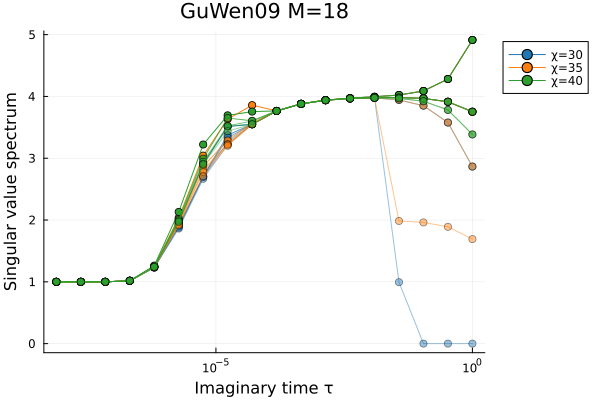

In [65]:
p = plot(xaxis=:log,legend = :outertopright,xlabel="Imaginary time τ",ylabel="Singular value spectrum",title="GuWen09 M=$M")
colors = [:]
for χ in range(30,40,step=5)
    i = Int((χ-30)//5+1)
    times = [3.0^(-M+i) for i in range(1,length(results[M,χ]))]
    @show length(times)
    for λi in range(1,5)
        label = λi == 1 ? "χ=$χ" : :none 
        plot!(times,reduce(hcat,results[M,χ])[λi,:],marker=:circ,label=label,color=palette(:tab10)[i],alpha=1/(0.3*λi+0.7))    
    end
end
p